<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/Exercise_1_Cats_vs_Dogs_Question_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
print(os.getcwd()); print(os.listdir())

/content
['.config', 'drive', 'sample_data']


In [117]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/DeepLearning.AI TensorFlow Developer/data')

['cats-and-dogs.zip']

In [128]:
path_cats_and_dogs = f'/content/drive/MyDrive/Colab Notebooks/DeepLearning.AI TensorFlow Developer/data/cats-and-dogs.zip'
shutil.rmtree('/tmp')

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [129]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

1500
1500


In [130]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')    
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
except OSError:
    pass

In [131]:
def split_data(source, training, testing, split_size) :
  dataset = []

  for a in os.listdir(source) :
    data = source + a

    if (os.path.getsize(data) > 0) :
      dataset.append(a)
    else :
      print('Skipped' + a)
      print('Invalided file silze ! i.e Zero length')

  train_len = int(len(dataset) * split_size)
  test_len = int(len(dataset) - train_len)

  shuffled_set = random.sample(dataset, len(dataset))

  train_set = shuffled_set[0: train_len]
  test_set = shuffled_set[-test_len :]

  for a in train_set :
    tmp_train_data = source + a
    final_train_data = training + a
    copyfile(tmp_train_data, final_train_data)

  for a in test_set :
    tmp_test_data = source + a
    final_test_data = testing + a
    copyfile(tmp_test_data, final_test_data)

In [132]:
main_dir = ['/tmp/PetImages/Cat/', '/tmp/PetImages/Dog/']
training_dir = ['/tmp/cats-v-dogs/training/cats/', '/tmp/cats-v-dogs/training/dogs/']
testing_dir = ['/tmp/cats-v-dogs/testing/cats/', '/tmp/cats-v-dogs/testing/dogs/']

for i in range(len(main_dir)) :
  split_data(main_dir[i], training_dir[i], testing_dir[i], .9)

In [133]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))

1350
1350
150
150


In [136]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [151]:
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [152]:
TRAINING_DIR = '/tmp/cats-v-dogs/training'
TESTING_DIR = '/tmp/cats-v-dogs/testing'

train_datagen =ImageDataGenerator(rescale = 1. /255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)

validation_generator = test_datagen.flow_from_directory(
    TESTING_DIR,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [153]:
history = model.fit_generator(train_generator,
                              epochs = 10,
                              verbose = 1,
                              validation_data = validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
135/135 [==============================] - 67s 491ms/step - loss: 1.0115 - acc: 0.5354 - val_loss: 0.6157 - val_acc: 0.6267
Epoch 2/10
135/135 [==============================] - 66s 488ms/step - loss: 0.6244 - acc: 0.6663 - val_loss: 0.5489 - val_acc: 0.7400
Epoch 3/10
135/135 [==============================] - 66s 486ms/step - loss: 0.5183 - acc: 0.7465 - val_loss: 0.5154 - val_acc: 0.7667
Epoch 4/10
135/135 [==============================] - 65s 485ms/step - loss: 0.4281 - acc: 0.7986 - val_loss: 0.5771 - val_acc: 0.7433
Epoch 5/10
135/135 [==============================] - 65s 484ms/step - loss: 0.3694 - acc: 0.8265 - val_loss: 0.6072 - val_acc: 0.7733
Epoch 6/10
135/135 [==============================] - 66s 488ms/step - loss: 0.2524 - acc: 0.8957 - val_loss: 0.7540 - val_acc: 0.7400
Epoch 7/10
135/135 [==============================] - 66s 487ms/step - loss: 0.1740 - acc: 0.9349 - val_loss: 0.8038 - val_acc: 0.7667
Epoch 8/10
135/135 [==============================] - 6

<Figure size 432x288 with 0 Axes>

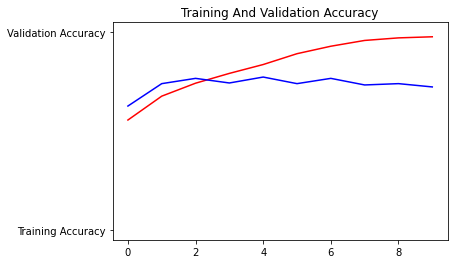

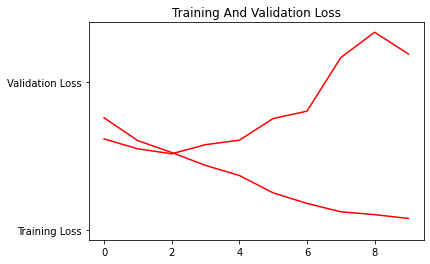

<Figure size 432x288 with 0 Axes>

In [154]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'r', 'Validation Loss')
plt.title('Training And Validation Loss')
plt.figure()